In [1]:
# Time series handbook
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
# For time stamps
from datetime import datetime


In [7]:

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

    
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-01,180.789993,183.000000,179.949997,180.970001,180.970001,29174500,AMAZON
2024-04-02,179.070007,180.789993,178.380005,180.690002,180.690002,32611500,AMAZON
2024-04-03,179.899994,182.869995,179.800003,182.410004,182.410004,31046600,AMAZON
2024-04-04,184.000000,185.100006,180.000000,180.000000,180.000000,41624300,AMAZON
2024-04-05,182.380005,186.270004,181.970001,185.070007,185.070007,42335200,AMAZON
2024-04-08,186.899994,187.289993,184.809998,185.190002,185.190002,39221300,AMAZON
2024-04-09,187.240005,187.339996,184.199997,185.669998,185.669998,36546900,AMAZON
2024-04-10,182.770004,186.270004,182.669998,185.949997,185.949997,35879200,AMAZON
2024-04-11,186.740005,189.770004,185.509995,189.050003,189.050003,40020700,AMAZON


In [17]:
df['company_name']=='AMAZON'

Date
2023-04-14    False
2023-04-17    False
2023-04-18    False
2023-04-19    False
2023-04-20    False
              ...  
2024-04-08     True
2024-04-09     True
2024-04-10     True
2024-04-11     True
2024-04-12     True
Name: company_name, Length: 1004, dtype: bool

# Descriptive analysis

In [28]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,181.023785,182.492311,179.697729,181.180996,180.754595,5.761730e+07
std,8.950970,8.798666,8.868189,8.835075,8.857596,1.762522e+07
min,163.059998,165.279999,162.800003,163.759995,162.890533,2.404830e+07
25%,173.154999,174.650002,172.005005,173.690002,173.265121,4.670805e+07
50%,180.669998,182.229996,178.550003,180.710007,180.238220,5.363130e+07
75%,189.294998,189.990005,187.695000,189.334999,188.909798,6.267560e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [29]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-14 to 2024-04-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Closing Price¶
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

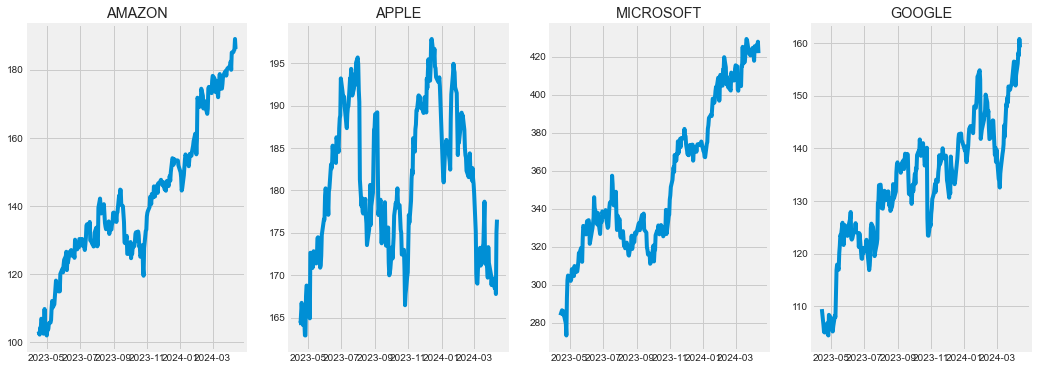

In [32]:
plt.figure(figsize=(16,6))
plt.subplot(1,4,1)
#plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(df['Adj Close'][df['company_name']=='AMAZON'])
plt.title("AMAZON")
plt.subplot(1,4,2)
plt.plot(df['Adj Close'][df['company_name']=='APPLE'])
plt.title("APPLE")
plt.subplot(1,4,3)
plt.plot(df['Adj Close'][df['company_name']=='MICROSOFT'])
plt.title("MICROSOFT")
plt.subplot(1,4,4)
plt.plot(df['Adj Close'][df['company_name']=='GOOGLE'])
plt.title("GOOGLE")


plt.show()

## Volume of Sales¶
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

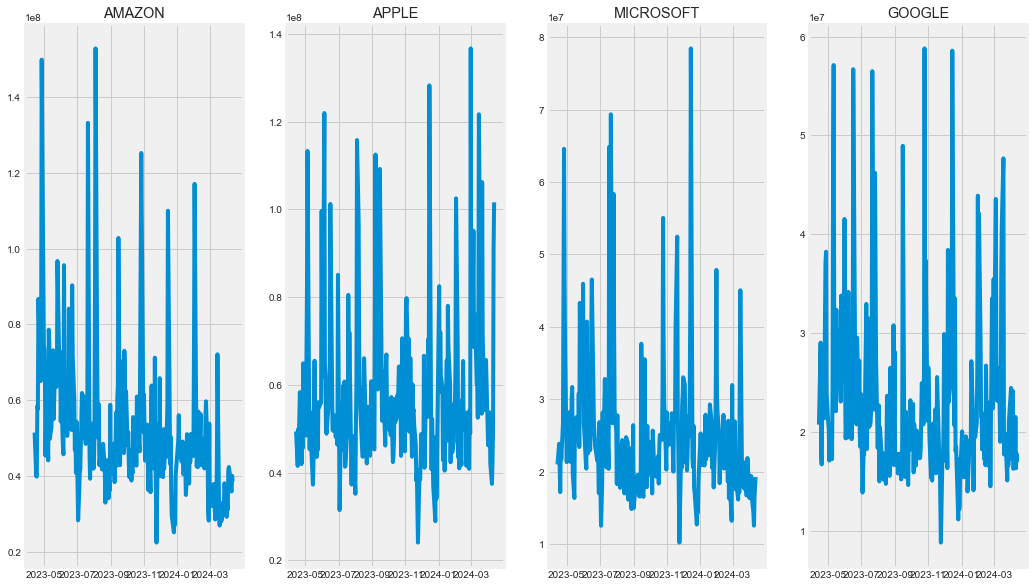

In [33]:
plt.figure(figsize=(16,10))
plt.subplot(1,4,1)
#plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(df['Volume'][df['company_name']=='AMAZON'])
plt.title("AMAZON")
plt.subplot(1,4,2)
plt.plot(df['Volume'][df['company_name']=='APPLE'])
plt.title("APPLE")
plt.subplot(1,4,3)
plt.plot(df['Volume'][df['company_name']=='MICROSOFT'])
plt.title("MICROSOFT")
plt.subplot(1,4,4)
plt.plot(df['Volume'][df['company_name']=='GOOGLE'])
plt.title("GOOGLE")


plt.show()

# What was the moving average of the various stocks?¶
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

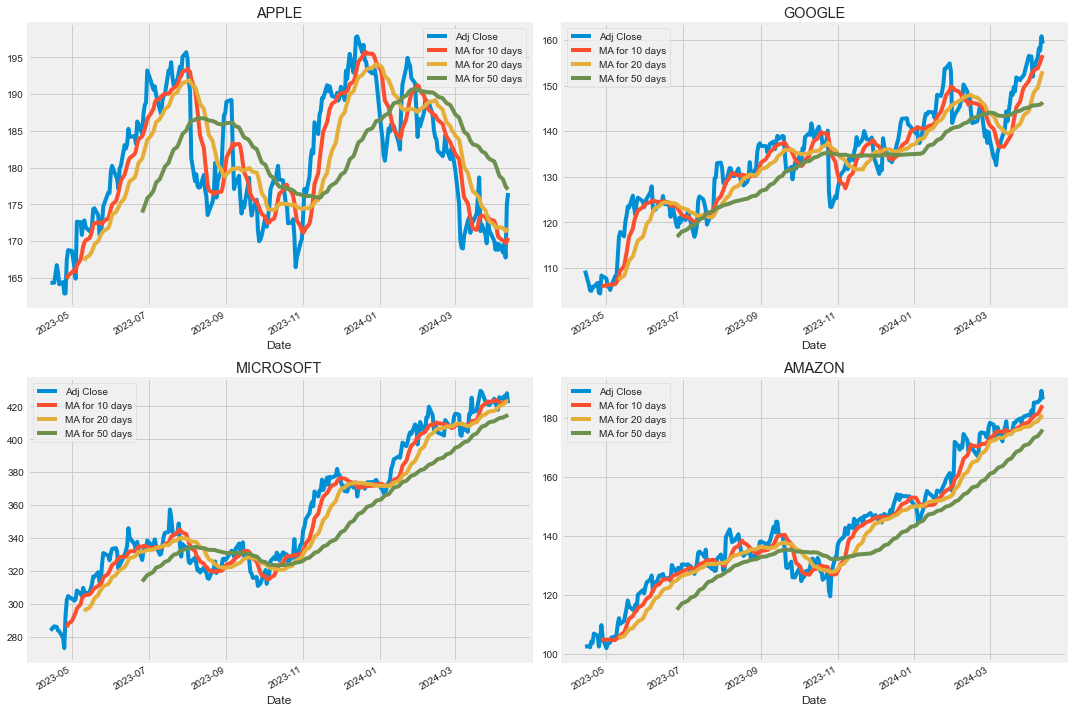

In [34]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# What was the daily return of the stock on average?¶
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the `daily changes` of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

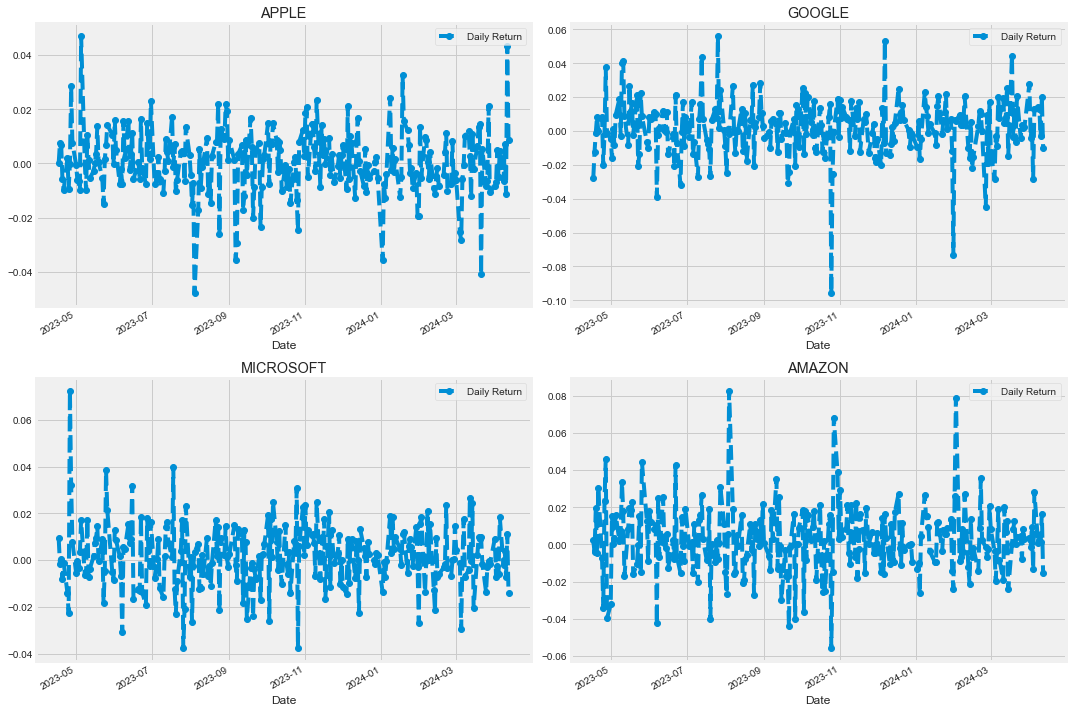

In [43]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

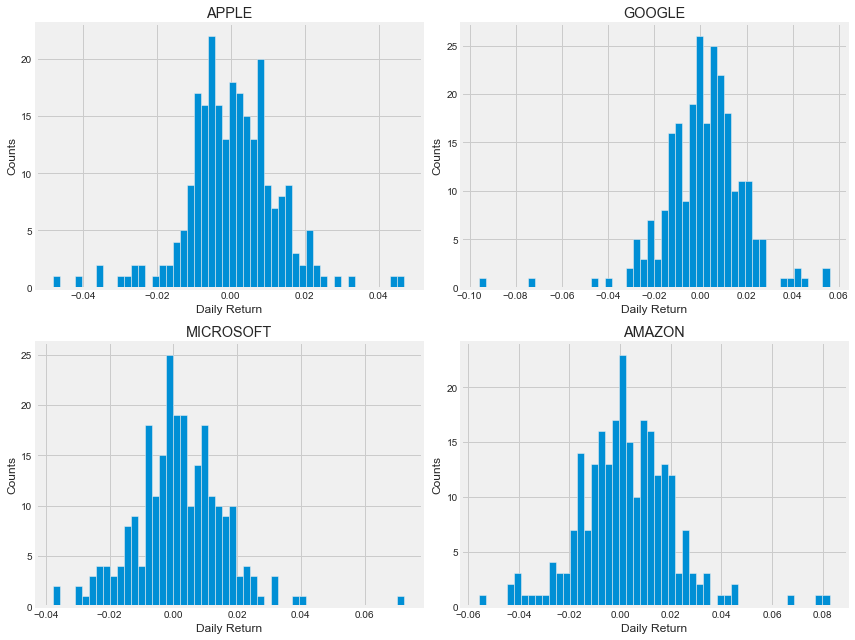

In [44]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# What was the correlation between different stocks closing prices?¶
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [53]:
new_pd = pd.concat([AAPL['Close'], GOOG['Close'], AMZN['Close'], MSFT['Close']], axis = 1)
new_pd.columns = ['AAPL', 'GOOG', 'AMZN', 'MSFT']

In [55]:
new_pd.corr()

,AAPL,GOOG,AMZN,MSFT
AAPL,1.000000,0.211368,0.162217,0.246884
GOOG,0.211368,1.000000,0.863699,0.810553
AMZN,0.162217,0.863699,1.000000,0.952204
MSFT,0.246884,0.810553,0.952204,1.000000


<AxesSubplot:>

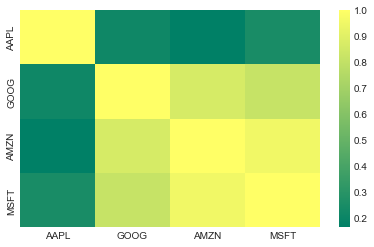

In [59]:
sns.heatmap(new_pd.corr(), cmap = 'summer')

In [60]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-14,NaN,NaN,NaN,NaN
2023-04-17,0.000121,0.002244,-0.027773,0.009296
2023-04-18,0.007505,-0.004283,-0.012216,-0.001489
2023-04-19,0.006968,0.019550,-0.000951,0.000278
2023-04-20,-0.005846,-0.004698,0.008379,-0.008112


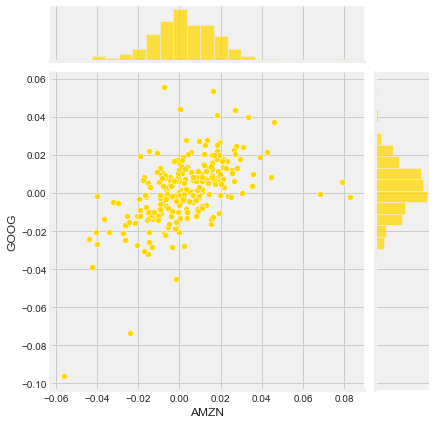

In [62]:
sns.jointplot(x= 'AMZN', y = "GOOG", data = tech_rets, kind = 'scatter', color = 'gold')

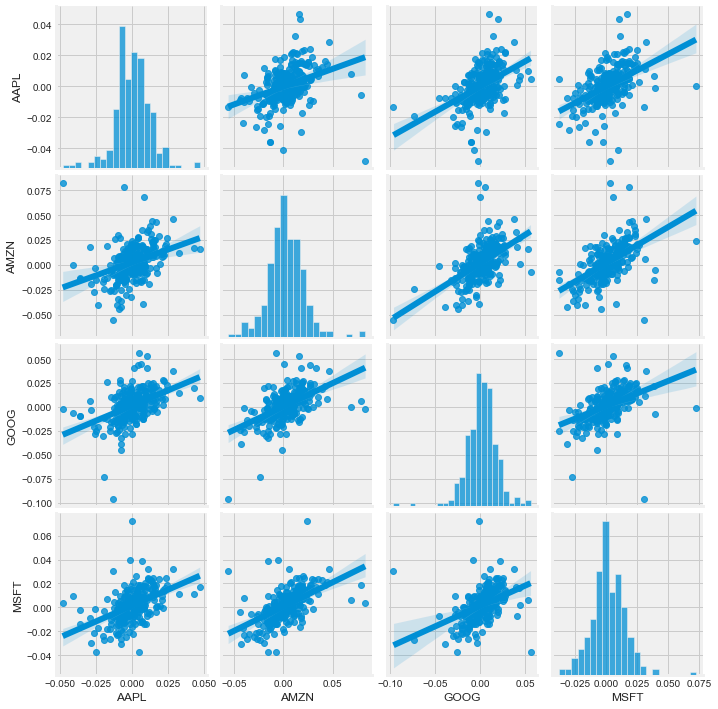

In [66]:

# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

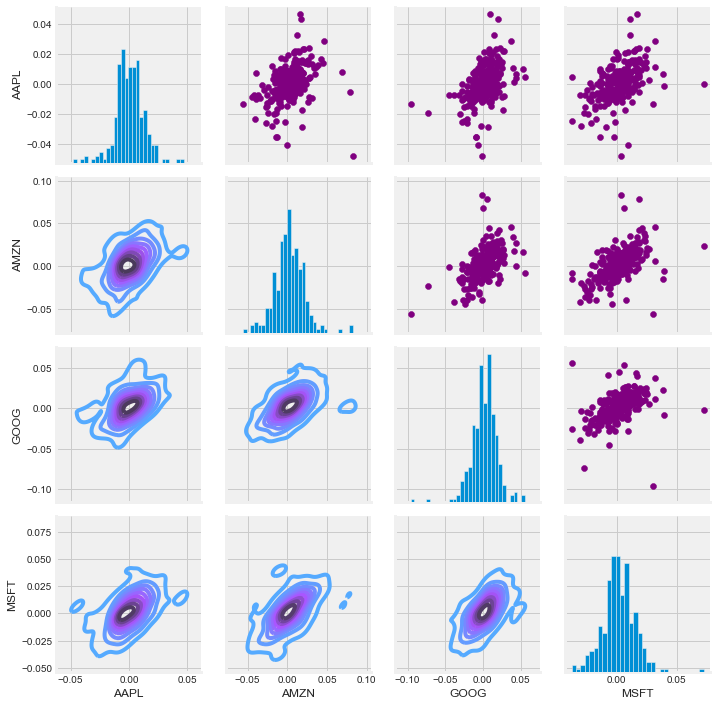

In [67]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

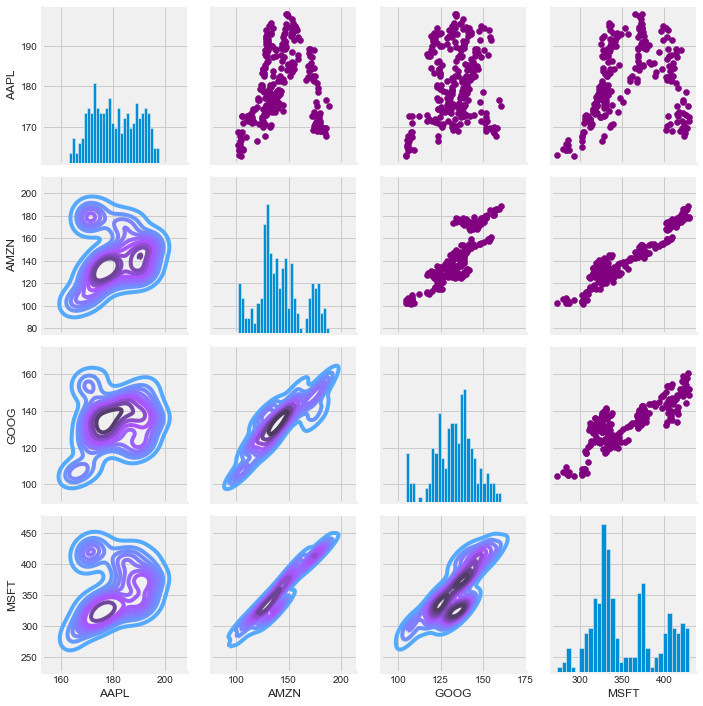

In [68]:

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

# How much value do we put at risk by investing in a particular stock?¶
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

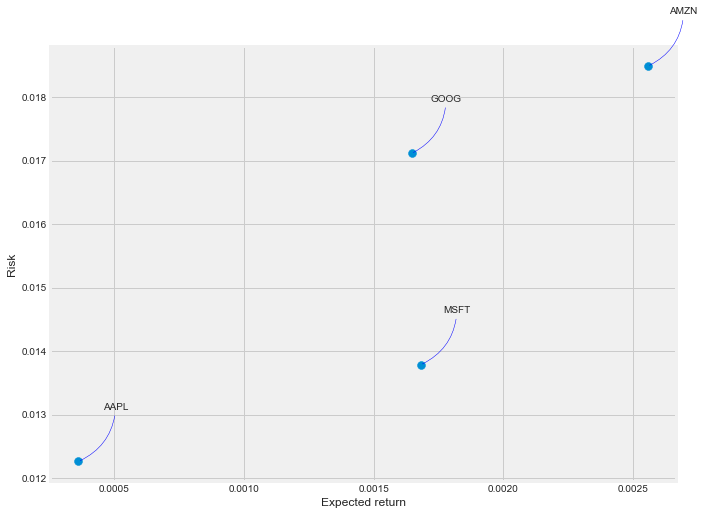

In [69]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Use LSTM to predict closing price of APPLE Inc

In [2]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433822,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751297,394024400


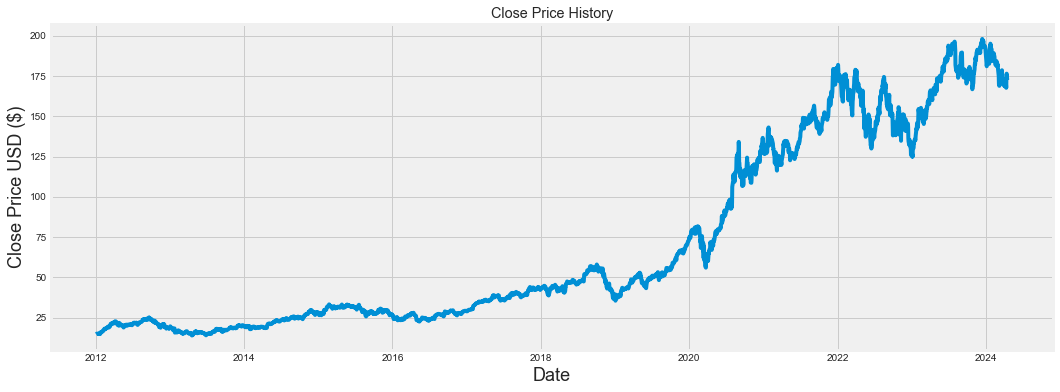

In [3]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [28]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2936

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range = (0,1))
dataset = mms.fit_transform(dataset)

In [204]:
# Use close price of past 60 days as features
x, y=[],[]

for i in range(60,len(dataset)):
    x.append(dataset[(i-60):i, :])
    y.append(dataset[i, :])
x, y = np.array(x), np.array(y)    

In [226]:
#x_train[0,:,:]
#y_train
#x_train = torch.tensor(x_train.reshape(x_train.shape[0], x_train.shape[1]))
x_train, y_train = x[0:training_data_len,:], y[0:training_data_len:, ]
x_test,y_test = x[training_data_len:, :], y[training_data_len:, :]
x_train, x_test = torch.tensor(x_train),torch.tensor(x_test)
y_train = torch.tensor(y_train.reshape(y_train.shape[0],1))
y_test = torch.tensor(y_test.reshape(y_test.shape[0],1))
x_train, y_train, x_test,y_test = x_train.float(), y_train.float(), x_test.float(), y_test.float()

In [213]:
dataset.shape; x_train.shape

torch.Size([2936, 60, 1])

In [77]:
"""
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
"""


"\nfrom keras.models import Sequential\nfrom keras.layers import Dense, LSTM\n\n# Build the LSTM model\nmodel = Sequential()\nmodel.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))\nmodel.add(LSTM(64, return_sequences=False))\nmodel.add(Dense(25))\nmodel.add(Dense(1))\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n\n# Train the model\nmodel.fit(x_train, y_train, batch_size=1, epochs=1)\n"

In [62]:
import torch.nn as nn 
import torch 
import torch.optim as optim


In [227]:
## Pytorch LSTM ### 
class SimpleLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers = 1):
        super(SimpleLSTM, self).__init__()
        # Build the neural network
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers)
        self.fc = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        # Pass input through LSTM
        lstm_out, _ = self.lstm(x)
        out = self.relu(lstm_out[:,-1,:]) # sqeeze, reshape to select last hidden state for each sequence?? 
        out = self.fc(out)
        return out

In [228]:
criterion = nn.MSELoss()
input_dim = x_train.shape[1]
hidden_dim = 64
output_dim = 1
n_epochs = 50
lr = 0.001

In [229]:
model = SimpleLSTM(input_dim=input_dim, hidden_dim = hidden_dim, output_dim = output_dim)
model_opt = torch.optim.Adam(model.parameters(), lr=lr)
#output = model(x_train)

In [234]:
loss_res = []
test_res = []
for epoch in range(n_epochs):
    # Zero out the  gradients
    model_opt.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    model_opt.step()
    
    test_output = model(x_test)
    test_res.append(criterion(test_output, y_test).item())
    loss_res.append(loss.item())

Text(0.5, 1.0, 'Training Loss')

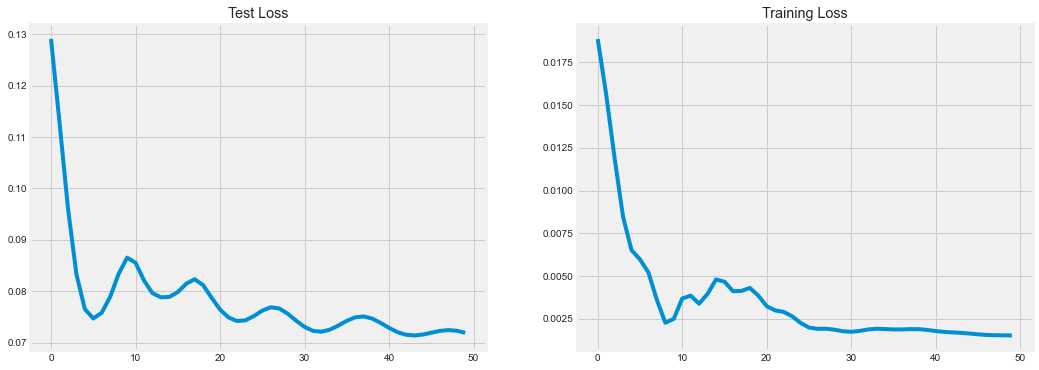

In [244]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(test_res)
plt.title("Test Loss")
plt.subplot(1,2,2)
plt.plot(loss_res)
plt.title("Training Loss")

# Transformer

torch.Size([94, 60, 1])